# Predicting whether or not a patient has diabetes, based on certain diagnostic measurements.

# Table Of Contents:
- Importing the required libraries
- Importing dataset and checking the data
- Data Visualization
- Creating the train and test data set
- Building an artificial neural network model
- Predicting the output of 2 custom records

# 1. Importing the required libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

import tensorflow as tf

# 2. Importing dataset and checking the data¶

In [2]:
pima_diabetes_df = pd.read_csv(r"D:\001_Data\Not Completed\PIMA Diabetes\diabetes.csv")

In [3]:
pima_diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima_diabetes_df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
pima_diabetes_df.shape

(768, 9)

In [6]:
pima_diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
pima_diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
pima_diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 3. Data Visualization

Text(0, 0.5, 'PREGNANCY COUNT')

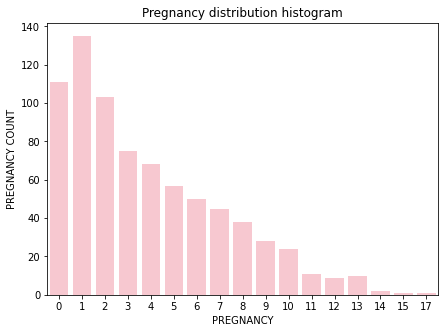

In [11]:
plt.figure(figsize=(7,5))
sns.countplot(pima_diabetes_df["Pregnancies"], color="pink")
plt.title('Pregnancy distribution histogram')
plt.xlabel('PREGNANCY')
plt.ylabel('PREGNANCY COUNT')

Text(0, 0.5, 'GLUCOSE')

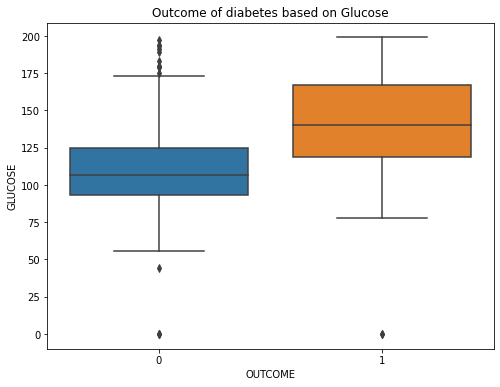

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Outcome", y="Glucose", data=pima_diabetes_df)
plt.title('Outcome of diabetes based on Glucose')
plt.xlabel('OUTCOME')
plt.ylabel('GLUCOSE')

Text(0, 0.5, 'BLOOD PRESSURE')

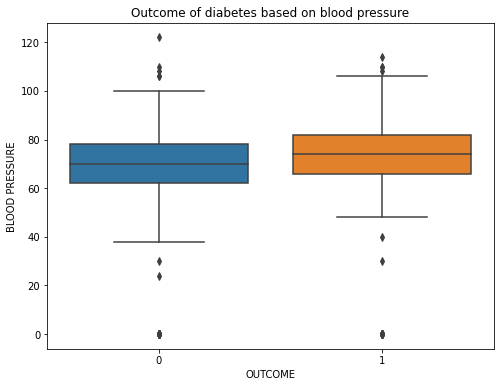

In [10]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Outcome", y="BloodPressure", data=pima_diabetes_df)
plt.title('Outcome of diabetes based on blood pressure')
plt.xlabel('OUTCOME')
plt.ylabel('BLOOD PRESSURE')

Text(0, 0.5, 'SKIN THICKNESS')

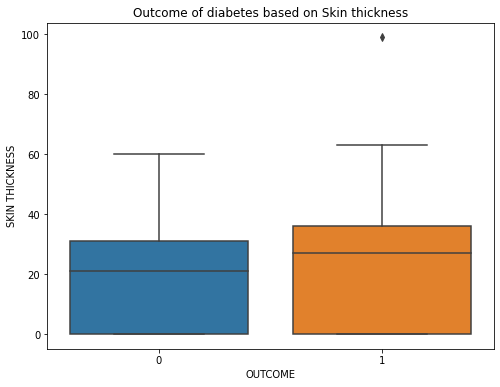

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Outcome", y="SkinThickness", data=pima_diabetes_df)
plt.title('Outcome of diabetes based on Skin thickness')
plt.xlabel('OUTCOME')
plt.ylabel('SKIN THICKNESS')

Text(0, 0.5, 'INSULIN LEVELS')

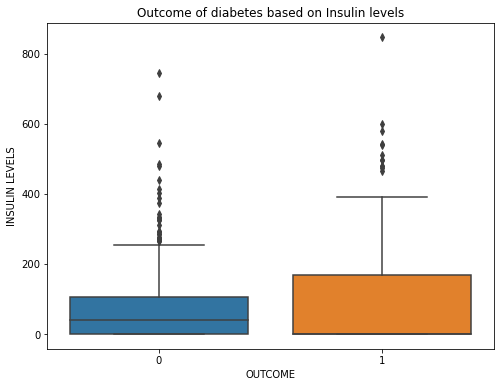

In [12]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Outcome", y="Insulin", data=pima_diabetes_df)
plt.title('Outcome of diabetes based on Insulin levels')
plt.xlabel('OUTCOME')
plt.ylabel('INSULIN LEVELS')

Text(0, 0.5, 'BMI')

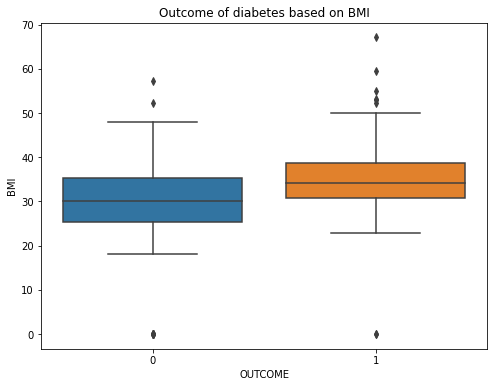

In [13]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Outcome", y="BMI", data=pima_diabetes_df)
plt.title('Outcome of diabetes based on BMI')
plt.xlabel('OUTCOME')
plt.ylabel('BMI')

Text(0, 0.5, 'DIABETES PEDIGREE FUNCTION')

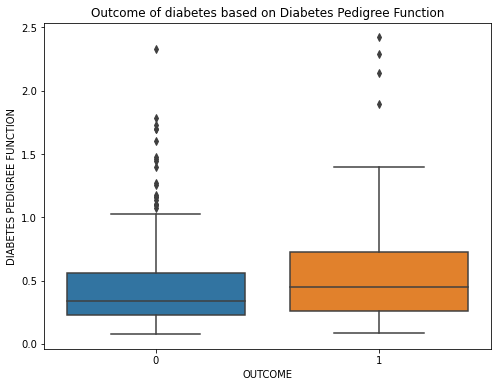

In [14]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Outcome", y="DiabetesPedigreeFunction", data=pima_diabetes_df)
plt.title('Outcome of diabetes based on Diabetes Pedigree Function')
plt.xlabel('OUTCOME')
plt.ylabel('DIABETES PEDIGREE FUNCTION')

Text(0, 0.5, 'AGE')

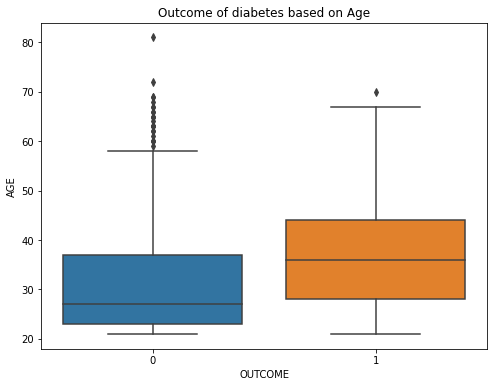

In [15]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Outcome", y="Age", data=pima_diabetes_df)
plt.title('Outcome of diabetes based on Age')
plt.xlabel('OUTCOME')
plt.ylabel('AGE')

Text(0, 0.5, 'BMI')

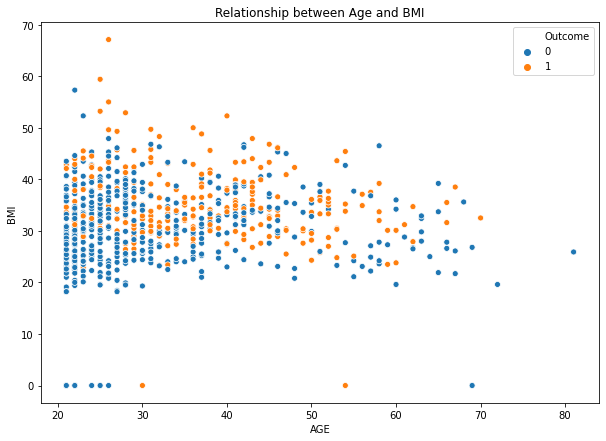

In [18]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="Age", y="BMI", data=pima_diabetes_df, hue = "Outcome")
plt.title('Relationship between Age and BMI')
plt.xlabel('AGE')
plt.ylabel('BMI')

Text(0, 0.5, 'INSULIN')

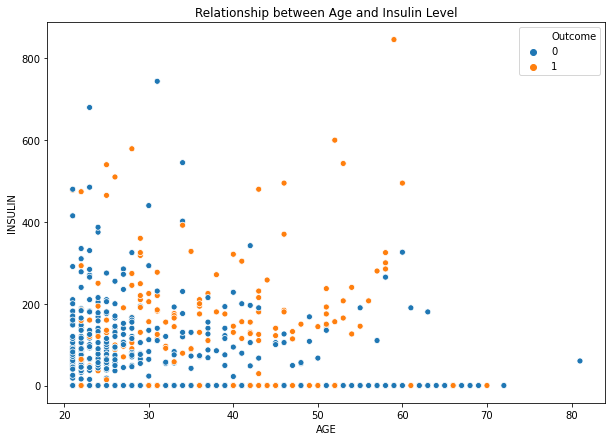

In [19]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="Age", y="Insulin", data=pima_diabetes_df, hue = "Outcome")
plt.title('Relationship between Age and Insulin Level')
plt.xlabel('AGE')
plt.ylabel('INSULIN')

Text(0, 0.5, 'BLOOD PRESSURE')

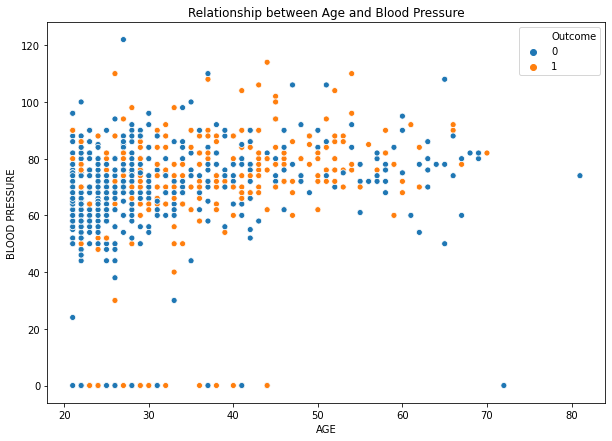

In [20]:
plt.figure(figsize=(10,7))
sns.scatterplot(x="Age", y="BloodPressure", data=pima_diabetes_df, hue = "Outcome")
plt.title('Relationship between Age and Blood Pressure')
plt.xlabel('AGE')
plt.ylabel('BLOOD PRESSURE')

Text(0.5, 1.0, 'Correlation Heatmap')

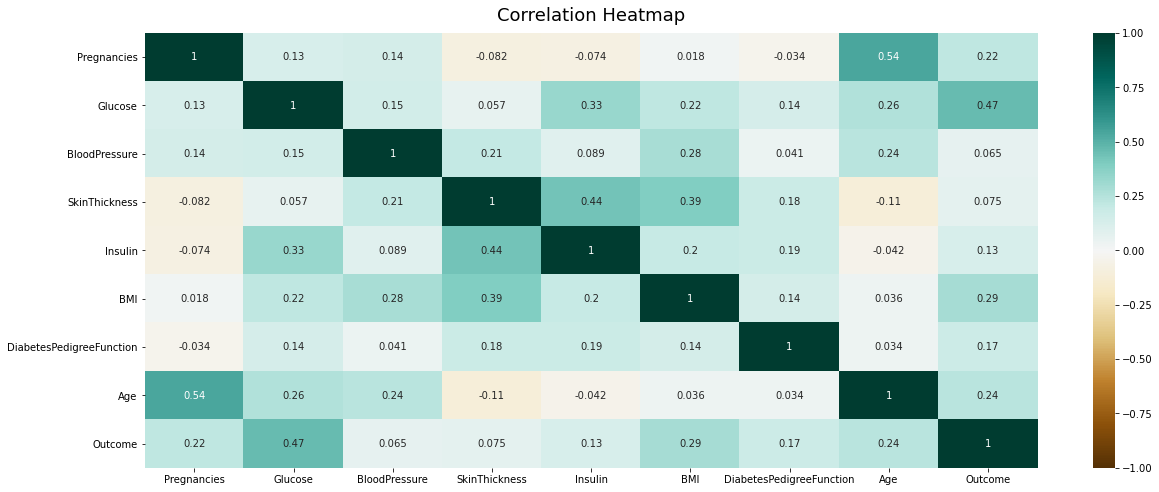

In [22]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(pima_diabetes_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

# 4. Creating the train and test data set

In [23]:
X = pima_diabetes_df.drop("Outcome", axis=1)

In [24]:
y = pima_diabetes_df["Outcome"]

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [26]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

# 5. Building an artificial neural network model

In [27]:
#INITIALIZING THE ANN MODEL

ann_model = tf.keras.models.Sequential()

In [28]:
#ADDING THE INPUT LAYER AND 1st HIDDEN LAYER

ann_model.add(tf.keras.layers.Dense(units=12, activation = 'relu'))

In [29]:
#ADDING THE 2nd HIDDEN LAYER

ann_model.add(tf.keras.layers.Dense(units = 12, activation = 'relu'))

In [30]:
#ADDING THE 3rd HIDDEN LAYER

ann_model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [31]:
#ADDING THE OUTPUT LAYER

ann_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [32]:
#COMPILING THE ANN MODEL

ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [33]:
#FITTING THE ANN MODEL ON THE TRAINING SET

ann_model.fit(X_train, y_train, batch_size = 32, epochs = 150)

Epoch 1/150
17/17 [==============================] - 0s 852us/step - loss: 0.7272 - accuracy: 0.3520
Epoch 2/150
17/17 [==============================] - 0s 1ms/step - loss: 0.7062 - accuracy: 0.3985
Epoch 3/150
17/17 [==============================] - 0s 997us/step - loss: 0.6945 - accuracy: 0.5438
Epoch 4/150
17/17 [==============================] - 0s 997us/step - loss: 0.6856 - accuracy: 0.6350
Epoch 5/150
17/17 [==============================] - 0s 997us/step - loss: 0.6779 - accuracy: 0.6685
Epoch 6/150
17/17 [==============================] - 0s 939us/step - loss: 0.6702 - accuracy: 0.6685
Epoch 7/150
17/17 [==============================] - 0s 1ms/step - loss: 0.6624 - accuracy: 0.6741
Epoch 8/150
17/17 [==============================] - 0s 870us/step - loss: 0.6526 - accuracy: 0.6778
Epoch 9/150
17/17 [==============================] - 0s 936us/step - loss: 0.6407 - accuracy: 0.6778
Epoch 10/150
17/17 [==============================] - 0s 997us/step - loss: 0.6257 - accuracy: 

17/17 [==============================] - 0s 927us/step - loss: 0.4232 - accuracy: 0.7933
Epoch 82/150
17/17 [==============================] - 0s 905us/step - loss: 0.4228 - accuracy: 0.7989
Epoch 83/150
17/17 [==============================] - 0s 938us/step - loss: 0.4215 - accuracy: 0.7896
Epoch 84/150
17/17 [==============================] - 0s 907us/step - loss: 0.4225 - accuracy: 0.7933
Epoch 85/150
17/17 [==============================] - 0s 824us/step - loss: 0.4213 - accuracy: 0.7970
Epoch 86/150
17/17 [==============================] - 0s 908us/step - loss: 0.4217 - accuracy: 0.7933
Epoch 87/150
17/17 [==============================] - 0s 878us/step - loss: 0.4203 - accuracy: 0.7914
Epoch 88/150
17/17 [==============================] - 0s 871us/step - loss: 0.4189 - accuracy: 0.7989
Epoch 89/150
17/17 [==============================] - 0s 880us/step - loss: 0.4188 - accuracy: 0.7970
Epoch 90/150
17/17 [==============================] - 0s 821us/step - loss: 0.4176 - accuracy: 

# 6. Predicting the output of 2 custom records

In [34]:
pima_diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
pima_diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [46]:
output1 = ann_model.predict(StandardScaler().fit_transform([[4, 121, 69, 21, 80, 32, 0.480, 33]])) > 0.5

In [73]:
output2 = ann_model.predict(StandardScaler().fit_transform([[5, 158, 74, 35, 0, 35, 0.697, 55]])) > 0.5

In [78]:
if(output1 != "True"):
    print("The patient doesn't have diabetes")
else:
    print("The patient have diabetes")

The patient doesn't have diabetes


D:\Py_Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


In [80]:
if(output2 != "True"):
    print("The patient doesn't have diabetes")
else:
    print("The patient have diabetes")

The patient doesn't have diabetes


D:\Py_Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.
